# Introducción al análisis de datos con Python

En esta lección, se introducen algunas de las capacidades de Python para el análisis de datos, las cuales son ampliamente utilizadas en áreas como [aprendizaje automatizado](https://es.wikipedia.org/wiki/Aprendizaje_autom%C3%A1tico) y [ciencia de datos](https://es.wikipedia.org/wiki/Ciencia_de_datos), entre otros.

## Análisis de datos del Titanic

Esta sección está basada en la competencia [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) organizada por [Kaggle](https://www.kaggle.com/).

### Sobre el Titanic

El [RMS Titanic](https://es.wikipedia.org/wiki/RMS_Titanic) ({numref}`figure-titanic`) fue un transatlántico británico que se hundió en 1912 durante su viaje inaugural entre Southampton y Nueva York. **Fallecieron más de 1500 personas de las 2224 que viajaban en el barco**.

El naufragio del Titanic conmocionó e indignó al mundo entero por el elevado número de víctimas mortales y por los errores cometidos en el accidente. Solamente portaba botes salvavidas para 1178 pasajeros, poco más de la mitad de los que iban a bordo en su viaje inaugural y un tercio de su capacidad total de 3547 personas. 

El Titanic es quizá el barco más famoso de la historia y su memoria se mantiene muy viva gracias a numerosos libros, canciones, películas, exposiciones y memoriales.

```{figure} img/titanic.jpg
:name: figure-titanic

El RMS Titanic al salir de Southampton el 10 de abril de 1912. Fotografía de [Francis Godolphin Osbourne Stuart](https://en.wikipedia.org/wiki/Francis_Godolphin_Osbourne_Stuart) compartida a través de [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:RMS_Titanic_3.jpg).
```

La competencia [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) es organizada regularmente por Kaggle. Su objetivo es predecir cuales pasajeros sobrevivieron y cuales no sobrevivieron al hundimiento del Titanic.

### Visualización y exploración de datos

Para construir un modelo de sobrevivencia de los pasajeros del Titanic, se proporcionan dos archivos [CSV (valores separados por comas)](https://es.wikipedia.org/wiki/Valores_separados_por_comas):

- [entrenamiento.csv](https://github.com/pf3311-cienciadatosgeoespaciales/2021-iii/blob/main/contenido/b/datos/entrenamiento.csv): contiene datos detallados sobre un subconjunto de pasajeros (891 registros), incluyendo una columna que indica si cada uno sobrevivió o no al naufragio. Este conjunto de datos se utiliza para generar el modelo.
- [evaluacion.csv](https://github.com/pf3311-cienciadatosgeoespaciales/2021-iii/blob/main/contenido/b/datos/evaluacion.csv): contiene otro subconjunto (418 registros) con las mismas columnas del conjunto de datos de entrenamiento, excepto la que indica si el pasajero sobrevivió al naufragio. Este conjunto se utiliza para evaluar el modelo generado con los datos de entrenamiento.

Para analizar los datos, se utilizará el paquete [pandas](https://pandas.pydata.org/) de Python.

In [1]:
import pandas as pd

#### Carga de datos

La función [read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) carga en un [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) el contenido de un archivo CSV.

In [2]:
# Carga de los datos de entrenamiento en un data frame de pandas

datos_entrenamiento = pd.read_csv("https://raw.githubusercontent.com/pf3311-cienciadatosgeoespaciales/2021-iii/main/contenido/b/datos/entrenamiento.csv")

#### Despliegue de datos tabulares

La función [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) retorna las primeras filas de un DataFrame.

In [3]:
# Despliegue de las primeras filas

datos_entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Las funciones [tail()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) y [sample()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) funcionan de manera similar, retornando respectivamente las últimas filas y un conjunto aleatorio de filas de un DataFrame.

#### Exploración

Se determinan las proporciones de sobrevivientes de acuerdo con diversas variables.

##### Sexo

In [4]:
# Tasa de sobrevivencia de mujeres

mujeres_sobrevivientes = datos_entrenamiento.loc[datos_entrenamiento.Sex == 'female']["Survived"]
tasa_sobrevivencia_mujeres = sum(mujeres_sobrevivientes)/len(mujeres_sobrevivientes)

print("Porcentaje de mujeres que sobrevivieron: {:3.2f}".format(tasa_sobrevivencia_mujeres))

Porcentaje de mujeres que sobrevivieron: 0.74


In [5]:
# Tasa de sobrevivencia de hombres

hombres_sobrevivientes = datos_entrenamiento.loc[datos_entrenamiento.Sex == 'male']["Survived"]
tasa_sobrevivencia_hombres = sum(hombres_sobrevivientes)/len(hombres_sobrevivientes)

print("Porcentaje de hombres que sobrevivieron: {:3.2f}".format(tasa_sobrevivencia_hombres))

Porcentaje de hombres que sobrevivieron: 0.19


##### Edad

In [6]:
# Tasa de sobrevivencia de menores

sobrevivientes_menores = datos_entrenamiento.loc[datos_entrenamiento.Age < 18]["Survived"]
tasa_sobrevivencia_menores = sum(sobrevivientes_menores)/len(sobrevivientes_menores)

print("Porcentaje de menores de edad que sobrevivieron: {:3.2f}".format(tasa_sobrevivencia_menores))

Porcentaje de menores de edad que sobrevivieron: 0.54


In [7]:
# Tasa de sobrevivencia de mayores

sobrevivientes_mayores = datos_entrenamiento.loc[datos_entrenamiento.Age >= 18]["Survived"]
tasa_sobrevivencia_mayores = sum(sobrevivientes_mayores)/len(sobrevivientes_mayores)

print("Porcentaje de mayores de edad que sobrevivieron: {:3.2f}".format(tasa_sobrevivencia_mayores))

Porcentaje de mayores de edad que sobrevivieron: 0.38


##### Clase

In [8]:
# Tasa de sobrevivencia de pasajeros de primera clase

clase1_sobrevivientes = datos_entrenamiento.loc[datos_entrenamiento.Pclass == 1]["Survived"]
tasa_sobrevivencia_clase1 = sum(clase1_sobrevivientes)/len(clase1_sobrevivientes)

print("Porcentaje de pasajeros de primera clase que sobrevivieron: {:3.2f}".format(tasa_sobrevivencia_clase1))

Porcentaje de pasajeros de primera clase que sobrevivieron: 0.63


In [9]:
# Tasa de sobrevivencia de pasajeros de segunda clase

clase2_sobrevivientes = datos_entrenamiento.loc[datos_entrenamiento.Pclass == 2]["Survived"]
tasa_sobrevivencia_clase2 = sum(clase2_sobrevivientes)/len(clase2_sobrevivientes)

print("Porcentaje de pasajeros de segunda clase que sobrevivieron: {:3.2f}".format(tasa_sobrevivencia_clase2))

Porcentaje de pasajeros de segunda clase que sobrevivieron: 0.47


In [10]:
# Tasa de sobrevivencia de pasajeros de tercera clase

clase3_sobrevivientes = datos_entrenamiento.loc[datos_entrenamiento.Pclass == 3]["Survived"]
tasa_sobrevivencia_clase3 = sum(clase1_sobrevivientes)/len(clase3_sobrevivientes)

print("Porcentaje de pasajeros de tercera clase que sobrevivieron: {:3.2f}".format(tasa_sobrevivencia_clase3))

Porcentaje de pasajeros de tercera clase que sobrevivieron: 0.28


#### Graficación

La función [plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) de Pandas genera gráficos estadísticos a partir de los datos de un DataFrame. Por defecto, utiliza la funcionalidad provista por la biblioteca [matplotlib](https://matplotlib.org/).

##### Sexo

<Axes: >

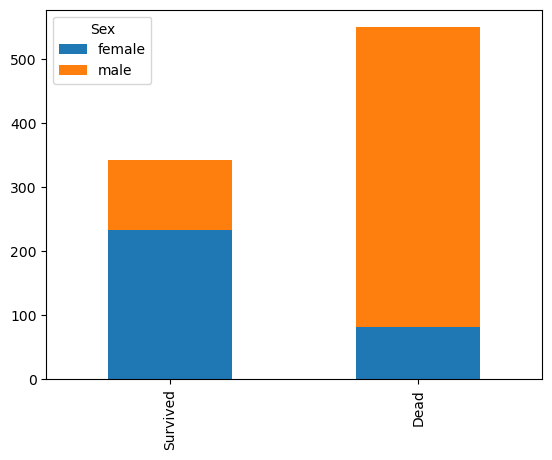

In [11]:
# Gráfico de barras de cantidades de sobrevivientes y fallecidos por sexo

sobrevivientes = datos_entrenamiento[datos_entrenamiento['Survived']==1]['Sex'].value_counts()
fallecidos = datos_entrenamiento[datos_entrenamiento['Survived']==0]['Sex'].value_counts()

df = pd.DataFrame([sobrevivientes, fallecidos])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked='True')

##### Edad

<Axes: >

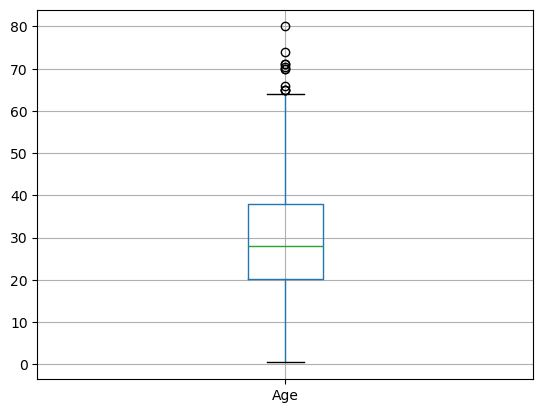

In [12]:
# Diagrama de caja (boxplot) de la variable edad (Age)

datos_entrenamiento.boxplot(column="Age")

<Axes: title={'center': 'Age'}, xlabel='Survived'>

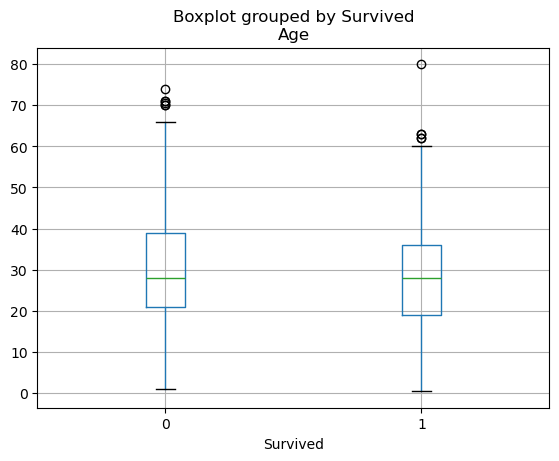

In [13]:
# Diagrama de caja de la variable edad y agrupado por la variable de sobrevivencia

datos_entrenamiento.boxplot(column="Age", by="Survived")

##### Clase

<Axes: >

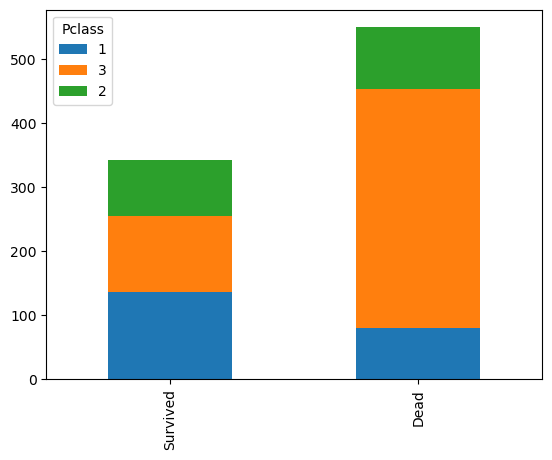

In [14]:
# Gráfico de barras de cantidades de sobrevivientes y fallecidos por clase de pasajero

sobrevivientes = datos_entrenamiento[datos_entrenamiento['Survived']==1]['Pclass'].value_counts()
fallecidos = datos_entrenamiento[datos_entrenamiento['Survived']==0]['Pclass'].value_counts()

df = pd.DataFrame([sobrevivientes, fallecidos])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked='True')

### Modelado

Seguidamente, se generará un modelo basado en [Random Forest](https://es.wikipedia.org/wiki/Random_forest). Este algoritmo de aprendizaje automatizado construye múltiples árboles de decisión, como se ejemplifica en la {numref}`figure-random-forest`.

```{figure} img/randomforest.png
:name: figure-random-forest

Representación gráfica del algoritmo Random Forest. Fuente [Kaggle](https://www.kaggle.com/alexisbcook/titanic-tutorial).
```

Cada registro de datos es evaluado en los árboles de decisión y el resultado más frecuente (i.e. sobreviviente o fallecido) pasa a ser la salida para ese registro.

En el siguiente bloque de código en Python, se construyen 100 árboles de decisión para generar un modelo para los datos de los pasajeros del Titanic, el cual predice si cada pasajero sobrevivió o no.

In [15]:
# Modelo generado con Radom Forest

from sklearn.ensemble import RandomForestClassifier

# Carga de los datos de entrenamiento en un data frame de pandas
datos_evaluacion = pd.read_csv("https://raw.githubusercontent.com/curso-python-imn/curso-python-imn.github.io/main/datos/titanic/evaluacion.csv")

y = datos_entrenamiento["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(datos_entrenamiento[features])
X_test = pd.get_dummies(datos_evaluacion[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': datos_evaluacion.PassengerId, 'Survived': predictions})
output.to_csv('datos/salida-random-forest.csv', index=False)
print("La salida del modelo se almacenó en el archivo datos/salida-random-forest.csv")

La salida del modelo se almacenó en el archivo datos/salida-random-forest.csv
